<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
<br>Перед отправкой проекта обязательно перезапускай ядро через Kernel -> Restart & Run All и проверяй, чтобы все ячейки отработали без ошибок. 43 ячейка сейчас падает с ошибкой. Поправь, пожалуйста, чтобы я смог проверить твой проект
</div>


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

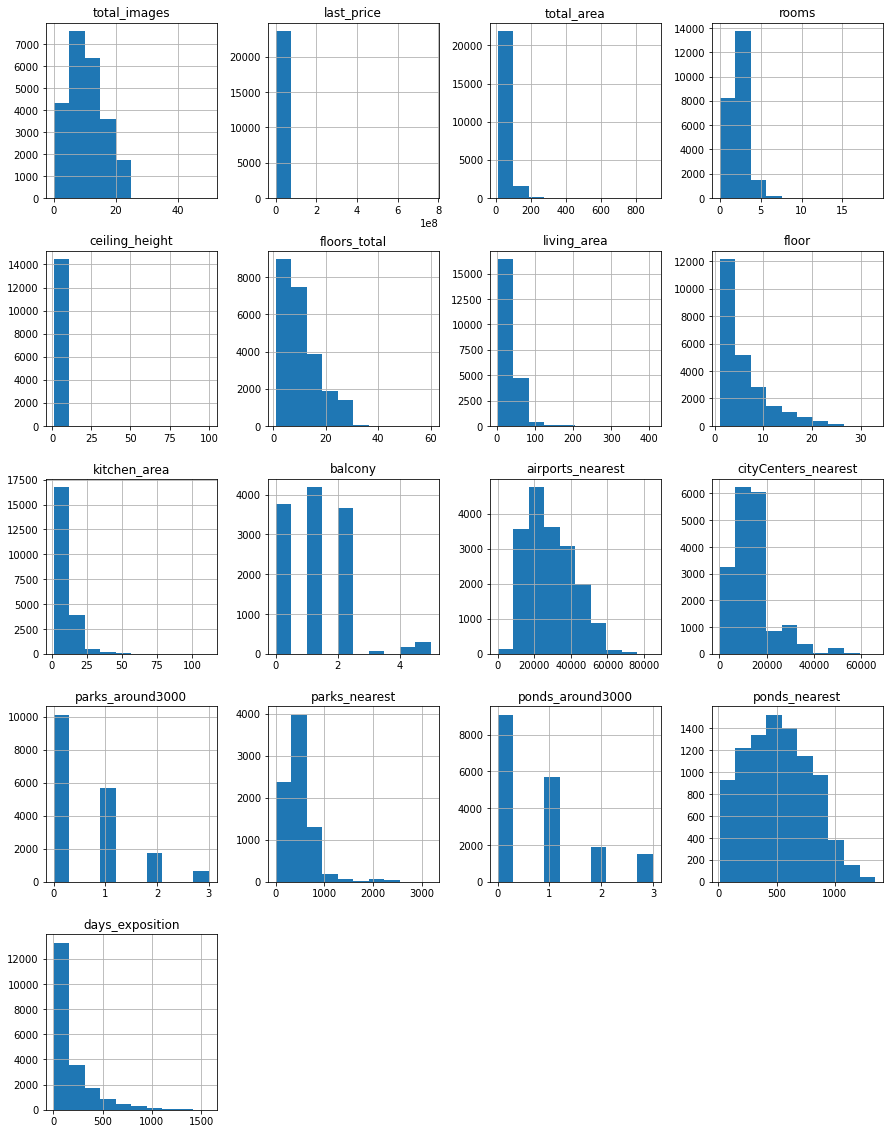

In [4]:
df.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
		
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

Исходя из графиков, можно сделать вывод, что данные имеют нормальное распределение. Выбивающихся значений нет или очень мало, тк они не заметны на гистограммах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

#### 0   total_images   non-null  int64  - число фотографий квартиры в объявлении

In [5]:
print(df['total_images'].min())
print(df['total_images'].max())

0
50


#### 1   last_price  non-null  float64  -  цена на момент снятия с публикации

12190.0
763000000.0


<AxesSubplot:>

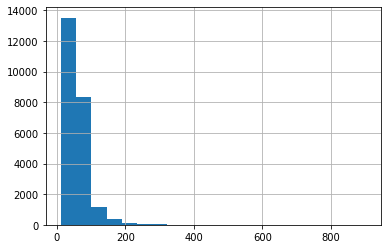

In [6]:
print(df['last_price'].min())
print(df['last_price'].max())
df['last_price'] = df['last_price'].astype('int')
df['total_area'].hist(bins=20)

Параметр last_price - "цена на момент снятия с публикации" имеет корректный тип float64, но преобразуем его в int, тк квартиры продаются без копеек. Стоимость заполнена везде, имеет большой разброс.

#### 2   total_area non-null  float64 - общая площадь квартиры в квадратных метрах (м²)

<AxesSubplot:>

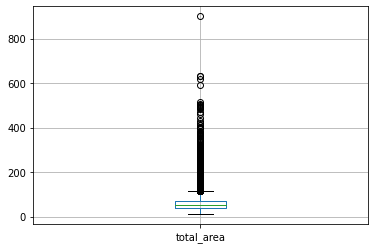

In [7]:
df.boxplot(column='total_area')


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

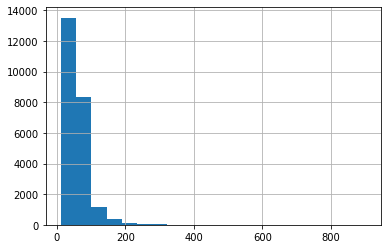

In [8]:
print(df['total_area'].describe())
df['total_area'].hist(range=(12, 900), bins=20)

Параметр total_area - "общая площадь квартиры в квадратных метрах (м²)" имеет корректный тип float64. Данные заполнены везде. Основной объем квартир до 100 м² (12 - 69 м²), максимум 900 м². Возможно, квартиры больше 300 м² - это аномальные значения, а также очень редкие. Удалим такие квартиры, тк их слишком мало (61), чтобы по ним делать выводы о продаже. А также, скорее всего это не квартиры.

In [9]:
#print(df[df['total_area']>300])
rows = df[df['total_area']>300].index
df = df.drop(rows)

#### 3   first_day_exposition  non-null  object  - дата публикации

Изменим тип столбца на Дату.

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
print(df['first_day_exposition'].min())
print(df['first_day_exposition'].max())

2014-11-27 00:00:00
2019-05-03 00:00:00


#### 4   rooms   non-null  int64  - число комнат

In [11]:
print(df['rooms'].value_counts())

1     8046
2     7940
3     5813
4     1175
5      310
0      196
6       96
7       43
8        8
9        4
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64


Так как мы рассматриваем объявления о продаже квартир, то количество комнат 0 или больше 5 посчитаем аномальным и удалим лишние данные.

In [12]:
rows = df[(df['rooms']>5) | (df['rooms']==0)].index
df = df.drop(rows)

#### 5 ceiling_height -  высота потолков (м) 

2.50    3511
2.60    1635
2.70    1548
3.00    1090
2.55     978
2.80     976
2.75     896
2.65     672
3.20     264
3.10     197
2.90     159
2.56     139
3.30     131
3.50     113
2.57     102
Name: ceiling_height, dtype: int64
1.0
100.0


<AxesSubplot:>

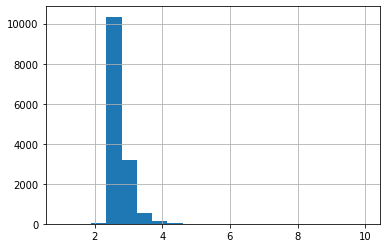

In [13]:
print(df['ceiling_height'].value_counts().head(15))
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
df['ceiling_height'].hist(range=(1, 10), bins=20)

Примем нормальную высоту потолков - от 2.4 метров до 4 метров. Посмотрим сколько строк укладывается в "норму" и сколько нет

In [14]:
print(len(df.query('ceiling_height>=2.4 & ceiling_height<=4')))
print(len(df.query('ceiling_height<2.4 | ceiling_height>4')))
print(df.query('ceiling_height<2.4 | ceiling_height>4')['ceiling_height'].value_counts().head(15))

14181
85
2.00     11
4.20      9
25.00     7
27.00     7
4.50      5
2.30      4
4.10      3
8.00      3
4.40      2
32.00     2
4.70      2
4.19      2
2.34      1
20.00     1
4.30      1
Name: ceiling_height, dtype: int64


Видим, что квартир с высотой потолков больше 4 метров и меньше 2.4 метров 85 штук. Также видим, что есть квартиры с высотой потолков 25, 27 и 32. Скорее всего в данном случае забыли поставить точку. Такие значения разделим на 10.

In [15]:
df['ceiling_height'] = df['ceiling_height']. \
    where((df['ceiling_height']<24) | (df['ceiling_height']>33), df['ceiling_height']/10)

print(len(df.query('ceiling_height<2.4 | ceiling_height>4')))

66


Осталось 66 некорректных значений. Все-таки будем считать значения больше 4 метров и меньше 2.4 метров некорректными, тк мы рассматриваем квартиры, а не подвальные помещения (с очень низкими потолками) или торговые центры (там потолки могут быть очень высокими).
Остальные значания сделаем равными -1.

In [16]:
df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'] = df['ceiling_height']. \
    where((df['ceiling_height']>2.4) & (df['ceiling_height']<4), -1)


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

#### 6 floors_total  -  всего этажей в доме

In [17]:
print(df['floors_total'].value_counts().sort_index())

1.0       25
2.0      374
3.0      648
4.0     1167
5.0     5714
6.0      862
7.0      569
8.0      379
9.0     3745
10.0    1167
11.0     200
12.0    1352
13.0     228
14.0     545
15.0     358
16.0    1354
17.0     815
18.0     491
19.0     330
20.0     263
21.0     151
22.0     282
23.0     346
24.0     454
25.0    1047
26.0     122
27.0     162
28.0      21
29.0       1
33.0       1
34.0       1
35.0      22
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64


In [18]:
len(df[df['floors_total'].isna()])

82

82 квартир, в которых не указана этажность дома. Оставим пока как есть, тк этажность по-умолчанию определить невозможно. 
Этажи остальных квартир с 1 по 60. Похоже на верные значения.

#### 7 living_area -  жилая площадь в квадратных метрах (м²) 

In [19]:
print(df['living_area'].max())
print(df['living_area'].min())
len(df[df['living_area']<10])

250.0
2.0


23

In [20]:
df[df['total_area'].isna() & df['living_area'].isna()]
df['total_area'].corr(df['living_area'])

0.9239300640761341

Жилая площадь меньше 10 метров очень неправдоподобна. Также видим сильную связь между общей и жилой площадью.

#### 8   floor int64 - этаж

In [21]:
print(df['floor'].max())
print(df['floor'].min())
print(len(df[df['floor']>df['floors_total']]))

33
1
0


С этажами все хорошо. Нет таких квартр, где номер этажа больше количества этажей в доме.

#### 9   is_apartment  object  -  апартаменты (булев тип)

Аппартаменты - это булев тип, поэтому меняем тип на bool

In [22]:
df['is_apartment'] = df['is_apartment'].astype('bool')
print(df['is_apartment'].value_counts())

True     20579
False     2705
Name: is_apartment, dtype: int64


#### 10  studio  bool - квартира-студия (булев тип)

In [23]:
print(df['studio'].value_counts())

False    23273
True        11
Name: studio, dtype: int64


#### 11  open_plan  bool - свободная планировка (булев тип)

In [24]:
print(df['open_plan'].value_counts())

False    23276
True         8
Name: open_plan, dtype: int64


#### 12  kitchen_area  float64 - площадь кухни в квадратных метрах (м²)

107.0
1.3
64
10


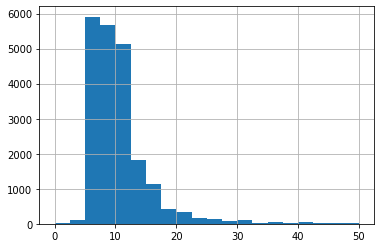

In [25]:
print(df['kitchen_area'].max())
print(df['kitchen_area'].min())
df['kitchen_area'].hist(range=(0, 50), bins=20)
print(len(df.query('kitchen_area<5 & total_area>30')[['total_area', 'kitchen_area', 'studio']].sort_values('kitchen_area')))
print(len(df.query('kitchen_area>30  & total_area<65')[['total_area', 'kitchen_area', 'studio']].sort_values('kitchen_area')))

Размер кухни от 1.3 до 112.0 м². Больше всего кухонь от 5 метров. Рассмотрим кухни меньше 5 метров при общей площади больше 30 метров, а также кухни больше 30 метров при общей площади меньше 65. Таких выбивающихся значений 64+10 не так много, оставим их.

#### 13  balcony  float64 - число балконов

Количество балконов - целое число, необходимо изменить тип даных на int. Отсутствующие значения заменим 0. А также значения больше трех заменим на 0, тк 4 или 5 балконов не встречаются.

In [26]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
df['balcony'] = df['balcony'].where(df['balcony']<=3, 0)
print(df['balcony'].value_counts())

0    15507
1     4130
2     3568
3       79
Name: balcony, dtype: int64


#### 14  locality_name  object -  название населённого пункта

Можно заметить, что в названиях встречаются Е и Ё. Необходимо заменить тип на str, для корректной работы функции replace.

In [27]:
df['locality_name'] = df['locality_name'].astype('str')
#df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('ё', 'е'))
df.loc[df['locality_name']=='nan', 'locality_name'] = 'Другой'
df['locality_name'].fillna('Другой')
print(df['locality_name'].value_counts())
#print(df['locality_name'].unique())

Санкт-Петербург                     15402
поселок Мурино                        529
поселок Шушары                        436
Всеволожск                            392
Пушкин                                366
                                    ...  
деревня Раздолье                        1
поселок Левашово                        1
садовое товарищество Новая Ропша        1
поселок Рабитицы                        1
деревня Русско                          1
Name: locality_name, Length: 329, dtype: int64


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### 16  cityCenters_nearest  float64 - расстояние до центра города (м)

Название столбца нужно переименовать, тк не соответствует змеиной нотации.

In [28]:
df.rename(columns={'cityCenters_nearest':'city_сenters_nearest'}, inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

#### 21  days_exposition  float64 - сколько дней было размещено объявление

Количество дней - это целое число, необходимо изменить тип столбца, а перед этим заполнить пустые значения на -1, чтобы отличить их от остальных(и пометить как обработанные). Пустые значения могут быть в случае, если квартира все еще продается

In [29]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition'] = df['days_exposition'].astype('int')
df[df['days_exposition']>0]['days_exposition'].describe()

count    20180.000000
mean       180.697027
std        219.328527
min          1.000000
25%         45.000000
50%         95.500000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Можно изменить тип данных без замены пропусков следующим образом
    
    import numpy as np
    df['col'] = np.floor(pd.to_numeric(df['col'], errors='coerce')).astype('Int64')
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Ты верно заполнила пропуски, поработал с типами данных, а также отбросил аномальные значения
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### цена одного квадратного метра;

In [30]:
df['price_metr'] = df['last_price'] / df['total_area']

#### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [31]:
df['day_of_week'] = df['first_day_exposition'].apply(lambda x: x.dayofweek)

#### месяц публикации объявления;

In [32]:
df['month'] = df['first_day_exposition'].apply(lambda x: x.month)

####  год публикации объявления;

In [33]:
df['year'] = df['first_day_exposition'].apply(lambda x: x.year)

#### тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [34]:
def get_floor_type(floor, floors_total):
    if floor==1:
        return 'первый'
    elif floor==floors_total:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(lambda x: get_floor_type(x['floor'], x['floors_total']), axis=1)

#### расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [35]:
df['city_km_nearest'] = (df['city_сenters_nearest']/1000).round().fillna(-1)
df['city_km_nearest'] = df['city_km_nearest'].astype('int')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

Изучите следующие параметры объектов

#### общая площадь

count    23284.000000
mean        58.806964
std         28.219240
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        295.000000
Name: total_area, dtype: float64

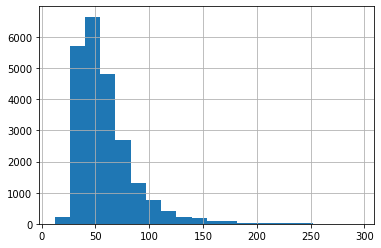

In [36]:
df['total_area'].hist(bins=20)
df['total_area'].describe()

Средняя площадь продаваемых квартир 58 м² (медиана 52 м²), минимальная площадь 12 м², максимальная 295 м² (в исходных данных была квартира 900 м², но все квартиры больше 300 м² были удалены как выбивающиеся значения)

#### жилая площадь

count    21415.000000
mean        33.481991
std         17.959358
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

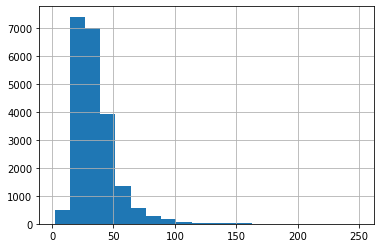

In [37]:
df['living_area'].hist(bins=20)
df['living_area'].describe()

<AxesSubplot:>

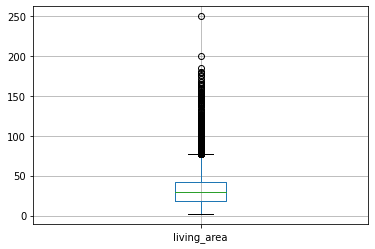

In [38]:
df.boxplot(column='living_area')

Средняя жилая площадь продаваемых квартир 33м² (медиана 30 м²). Минимальная площадь 2 м² - это выбивающееся значение.

#### площадь кухни

count    21229.000000
mean        10.447941
std          5.613517
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

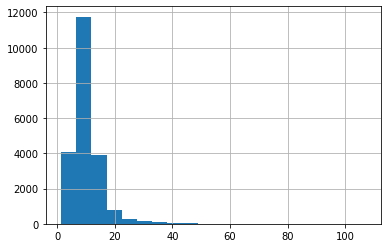

In [39]:
df['kitchen_area'].hist(bins=20)
df['kitchen_area'].describe()

<AxesSubplot:>

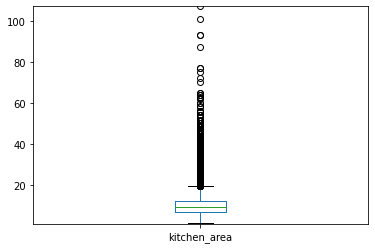

In [40]:
df['kitchen_area'].plot(kind='box', ylim=(1, 107))

Средняя площадь кухни 10 м² (медиана 9 м²). Но есть и кухня площадью 107 м² . Также есть и очень маленькие кухни, которые выбиваются.

#### цена объекта

count    23284.000000
mean         6.195074
std          7.296687
min          0.012190
25%          3.450000
50%          4.630000
75%          6.700000
max        330.000000
Name: last_price_mln, dtype: float64

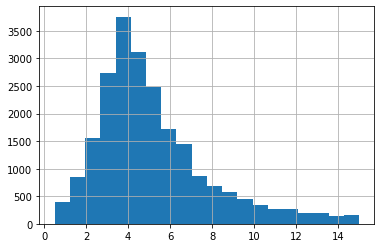

In [41]:
df['last_price_mln'] = df['last_price']/1000000
df['last_price_mln'].hist(bins=20, range=(0.5, 15))
df['last_price_mln'].describe()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

Средняя стоимость квартиры 6,19 млн (медиана 4,63 млн). Есть очень дорогие и очень дешевые квартиры.

#### количество комнат

count    23284.000000
mean         2.044967
std          0.956511
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

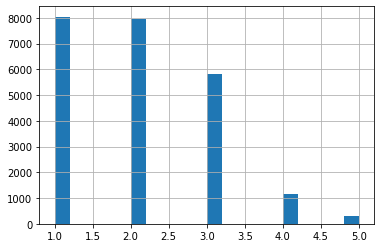

In [42]:
df['rooms'].hist(bins=20)
df['rooms'].describe()

В основном продаются одно и двухкомнатные квартиры, чуть меньше трехномнатных. 

#### высота потолков

count    14141.000000
mean         2.713308
std          0.242780
min          2.450000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

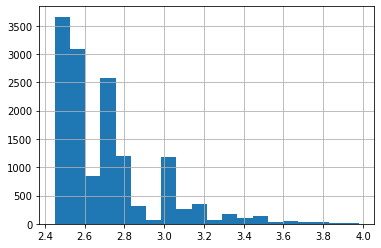

In [43]:
ch = df.query('ceiling_height>0')
ch['ceiling_height'].hist(bins=20)
ch['ceiling_height'].describe()

<AxesSubplot:>

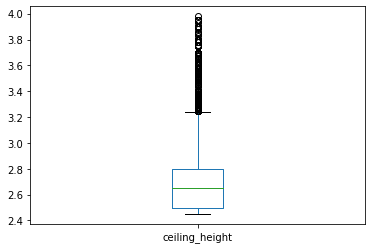

In [44]:
ch['ceiling_height'].plot(kind='box')

Обычно высота потолков 2,45-2,65 метров, но бывают и гораздо выше, но встречаются редко.

#### этаж квартиры

count    23284.000000
mean         5.883697
std          4.874674
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

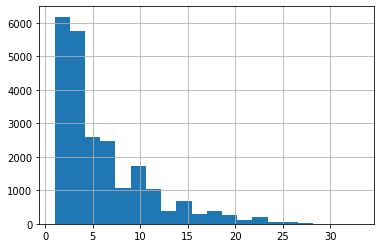

In [45]:
df['floor'].hist(bins=20)
df['floor'].describe()

В продаже больше всего квартир до 5 этажа.

#### тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:ylabel='floor'>

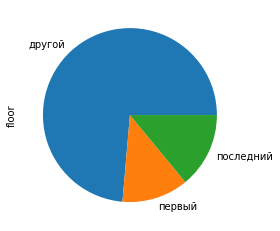

In [46]:
df['floor_type'].describe()
df \
    .pivot_table(index='floor_type', values='floor',  aggfunc='count')['floor'] \
    .plot(kind='pie')


Около четверти всех квартир - это первые и последние этажи.

#### общее количество этажей в доме

count    23202.000000
mean        10.665158
std          6.578132
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

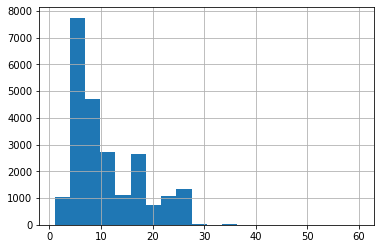

In [47]:
df['floors_total'].hist(bins=20)
df['floors_total'].describe()

В основном продаются квартиры в 5-16 - этажных домах.

#### расстояние до центра города в метрах

count    17849.000000
mean     14292.630624
std       8609.509651
min        181.000000
25%       9425.000000
50%      13149.000000
75%      16333.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

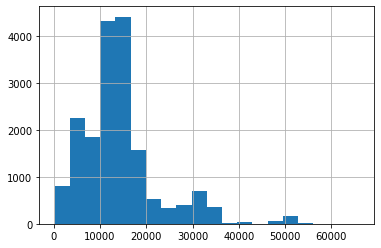

In [48]:
df['city_сenters_nearest'].hist(bins=20)
df['city_сenters_nearest'].describe()


Основная масса квартир находится на расстоянии 9-16 км от центра города.

#### расстояние до ближайшего аэропорта

count    17828.000000
mean     28864.577799
std      12674.484441
min          0.000000
25%      18542.000000
50%      26885.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

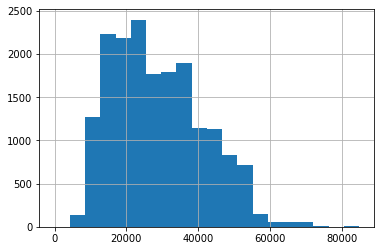

In [49]:
df['airports_nearest'].hist(bins=20)
df['airports_nearest'].describe()

Основная масса квартир находится на расстоянии 18-37 км от аэропорта.

#### расстояние до ближайшего парка

count    7902.000000
mean      491.977854
std       344.044345
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

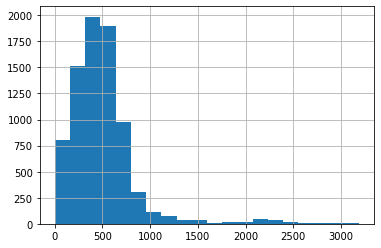

In [50]:
df['parks_nearest'].hist(bins=20)
df['parks_nearest'].describe()

Расстояние до ближайшего парка 288-613 метров. Видимо, если парк находится на расстоянии больше 613 он уже не считается ближайшим парком, не все его указывали при продаже.

#### день и месяц публикации объявления.

count    23284.00000
mean         6.39671
std          3.49130
min          1.00000
25%          3.00000
50%          6.00000
75%         10.00000
max         12.00000
Name: month, dtype: float64

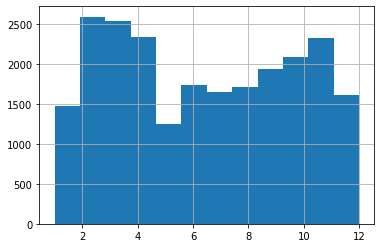

In [51]:
df['month'].hist(bins=12)
df['month'].describe()

В мае на продажу выставляется меньше всего квартир.

count    23284.000000
mean         2.568674
std          1.790793
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

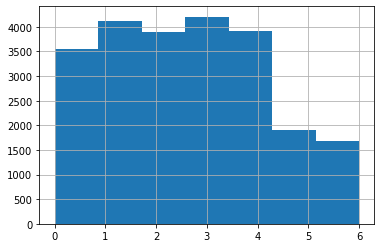

In [52]:
df['day_of_week'].hist(bins=7)
df['day_of_week'].describe()

В выходные публикуется в два раза меньше объявлений.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>По ссылке ниже можно почитать подробнее как подписать оси у графика
    
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Изучите, как быстро продавались квартиры

count    20180.000000
mean       180.697027
std        219.328527
min          1.000000
25%         45.000000
50%         95.500000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

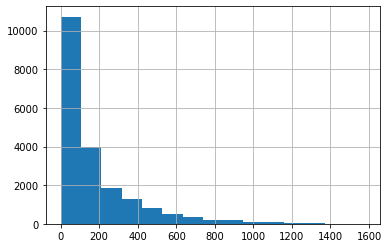

In [53]:
df[df['days_exposition']>0]['days_exposition'].hist(bins=15)
df[df['days_exposition']>0]['days_exposition'].describe()

<AxesSubplot:>

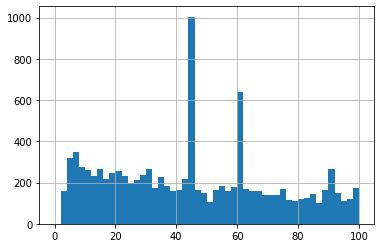

In [54]:
df[df['days_exposition']>0]['days_exposition'].hist(bins=50, range=(0, 100))

In [55]:
df[df['days_exposition']>0].corr()['days_exposition']

total_images           -0.030209
last_price              0.106582
total_area              0.161060
rooms                   0.117794
ceiling_height          0.056747
floors_total           -0.048329
living_area             0.148603
floor                  -0.038141
is_apartment           -0.063200
studio                 -0.011313
open_plan              -0.001119
kitchen_area            0.099912
balcony                -0.033741
airports_nearest       -0.018262
city_сenters_nearest   -0.056580
parks_around3000        0.057035
parks_nearest           0.027797
ponds_around3000        0.074512
ponds_nearest          -0.080609
days_exposition         1.000000
price_metr              0.046621
day_of_week            -0.024806
month                  -0.027911
year                   -0.611374
city_km_nearest        -0.030985
last_price_mln          0.106582
Name: days_exposition, dtype: float64

В среднем квартира продается за 180 дней (медиана 95 дней). Если посмотреть по гисторгамме, то большинство квартир продается менее, чем за 100 дней. Интересно, что пик продаж на 45 и на 60 дни. Были продажи и за один день, и за максимум 1580 дней. Судя по корреляции, количество дней на продажу не сильно зависит от других параметров.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [56]:
df[(df['days_exposition']>0) & (df['city_km_nearest']>0) & (df['locality_name']!='другой')] \
    .corr()['last_price'] \
    .sort_values()

city_km_nearest        -0.254861
city_сenters_nearest   -0.254387
ponds_nearest          -0.104701
year                   -0.073656
floors_total           -0.032810
airports_nearest       -0.030037
balcony                -0.029883
studio                 -0.008246
is_apartment           -0.006440
day_of_week             0.005123
month                   0.005489
floor                   0.006516
parks_nearest           0.009902
open_plan               0.017587
ceiling_height          0.044984
total_images            0.114642
days_exposition         0.119666
parks_around3000        0.174254
ponds_around3000        0.183272
rooms                   0.384380
kitchen_area            0.516439
living_area             0.578153
total_area              0.679337
price_metr              0.794036
last_price_mln          1.000000
last_price              1.000000
Name: last_price, dtype: float64

На общую стоимость квартиры больше всего влияет общая площадь, жилая площадь, площадь кухни, количество комнат, удаленность от центра. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию нас просили изучить зависимость от обще йстоимости квартиры, а не от стоимости за квадратный метр
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

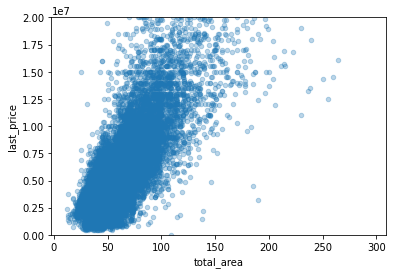

In [57]:
df.plot(x='total_area', y='last_price',  kind='scatter', alpha=0.3, ylim=(0, 20000000))

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

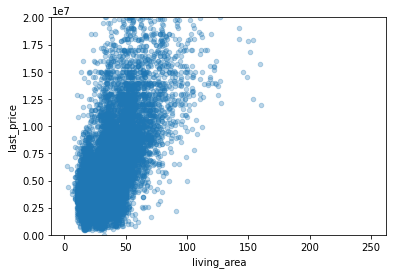

In [58]:
df.plot(x='living_area', y='last_price',  kind='scatter', alpha=0.3, ylim=(0, 20000000))

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

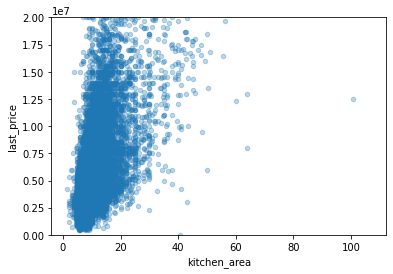

In [59]:
df.plot(x='kitchen_area', y='last_price',  kind='scatter', alpha=0.3, ylim=(0, 20000000))

<AxesSubplot:xlabel='rooms'>

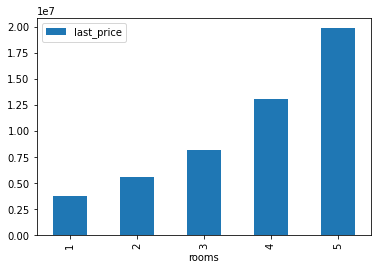

In [60]:
rooms_price = df.pivot_table(index='rooms', values='last_price')
rooms_price.plot.bar(y='last_price')

<AxesSubplot:xlabel='floor_type'>

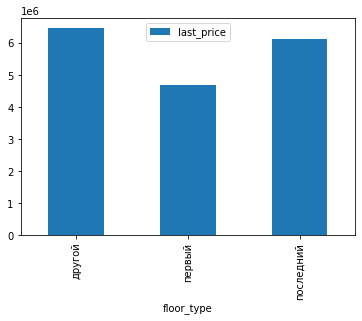

In [61]:
floor_type_price = df.pivot_table(index='floor_type', values='last_price')
floor_type_price.plot.bar(y='last_price')

<AxesSubplot:xlabel='day_of_week'>

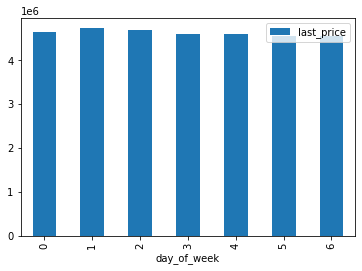

In [62]:
day_of_week_price = df.pivot_table(index='day_of_week', values='last_price', aggfunc='median')
day_of_week_price.plot.bar(y='last_price')

<AxesSubplot:xlabel='month'>

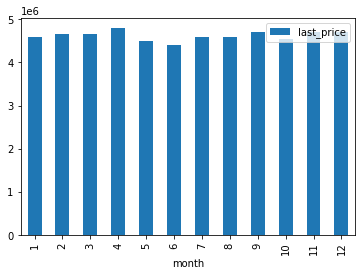

In [63]:
month_price = df.pivot_table(index='month', values='last_price', aggfunc='median')
month_price.plot.bar(y='last_price')

      last_price
year            
2014     7640000
2015     5300000
2016     4500000
2017     4500000
2018     4550000
2019     5020000


<AxesSubplot:xlabel='year'>

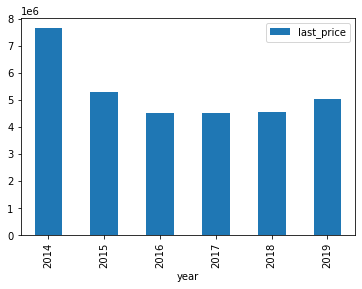

In [64]:
year_price = df.pivot_table(index='year', values='last_price', aggfunc='median')
print(year_price)
year_price.plot.bar(y='last_price')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Для категории этажа, дня, месяца и года продажи нужно построить barplot или гистограмму рассчитав среднее значение или медиану. После этого необходимо написать о зависимости цены от этих параметров
	
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

Исходя из графиков можно сделать вывод, что:
- Цена зависит от общей площади, жилой и площади кухни
- Чем больше комнат, тем дороже квартира
- Квартиры на первом этаже дешевле. На последнем этаже незначительно дешевле в среднем, чем на остальных.
- На квартиры выставленные в пн-ср самые высокие цены
- В мае-июне небольшой спад цен
- 2014-2016 цены на продаваемые квартиры опускались, 2016-2019 цены росли.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [65]:
spb_max = df \
    .pivot_table(index='locality_name', values=['price_metr'], aggfunc=['mean', 'count']) \
    .sort_values(('count', 'price_metr'), ascending=False) \
    .head(10)
spb_max

,mean,count
,price_metr,price_metr
locality_name,,
Санкт-Петербург,114134.355726,15402
поселок Мурино,85004.057852,529
поселок Шушары,78405.738420,436
Всеволожск,68618.013712,392
Пушкин,103221.059146,366
Колпино,75333.295801,337
поселок Парголово,90448.423806,322
Гатчина,68746.146763,307


In [66]:
spb_max.sort_values(('mean', 'price_metr'), ascending=False).head(1)

,mean,count
,price_metr,price_metr
locality_name,,
Санкт-Петербург,114134.355726,15402


In [67]:
spb_max.sort_values(('mean', 'price_metr'), ascending=True).head(1)

,mean,count
,price_metr,price_metr
locality_name,,
Выборг,58141.909153,237


Самая низкая цена за м² в деревне Ставрополье, а замая высокая в Зеленогорске.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужно выделить населённые пункты с максимальной и минимальной ценой из того списка топ10 что ты выводишь выше, а не из всех данных 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

#### Вычислите среднюю цену каждого километра

In [68]:
spb = df.query('locality_name == \'Санкт-Петербург\' & city_km_nearest>0').sort_values('city_km_nearest')

<AxesSubplot:xlabel='city_km_nearest', ylabel='price_metr'>

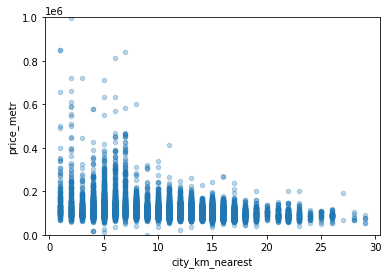

In [69]:
spb.plot(x='city_km_nearest', y='price_metr',  kind='scatter', alpha=0.3, ylim=(0, 1000000))

In [70]:
spb['mean_km'] = spb['price_metr'] / spb['city_km_nearest']
spb['mean_km'].mean()

15408.133198408148

Cредняя цена каждого километра в Санкт-Петербурге 15408 руб. 
Квартиры в радиусе 0-10 км от центра города стоят дороже. Самые дорогие на расстоянии 5-7 км. Чем дальше квартира от центра, тем ниже цена.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В данных нужно оставить только Питер
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Общий вывод

    В ходе выполнения проекта исследован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
    На начальном этапе удалены квартиры площадью больше 300 метров и квартиры, в которых больше 5 комнат. Удалены дублирующиеся названия населенных пунктов.
    Основное множество квартир: одно-двухкомнатные, в 5-16-этажных домах, 52-60 квадратных метра, с высотой потолка 2,65 метра.
    Подтверждено графиками: на общую стоимость квартиры больше всего влияет общая площадь, жилая площадь, площадь кухни, количество комнат, удаленность от центра. Найдены зависимости цены от площади квартиры, кухни, а также количества комнат.
    Установлено, что квартиры на первых этажах стоят дешевле. В мае-июне стоимость квартир незначительно уменьшается. В пн-ср чаще устанавливается более высокая стоимость на квартиры.
    Определена средняя цена одного квадратного метра в 10 населенных пунктах, где было больше всего объявлений. Самая дорогая цена за квадратный метр в Санкт-Петербурге.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Старайся писать общий вывод более развернуто используя информацию из промежуточных выводов
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- изучить зависимость от общей цены, а не от цены за квадратный метр
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений
<br>- корректно рассчитать стоимость каждого километра в последнем шаге
<br>- дописать общий вывод
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!

<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод